In [12]:
# Importar las librerías necesarias
import pandas as pd
import sqlite3

In [13]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [14]:
# Conectar a una base de datos en memoria
conn = sqlite3.connect(':memory:')

In [15]:
# Cargar el DataFrame en una tabla SQL llamada 'employees'
df.to_sql('employees', conn, index=False, if_exists='replace')

print("\nDataset cargado en una tabla SQL llamada 'employees'.")


Dataset cargado en una tabla SQL llamada 'employees'.


In [16]:
# Realizar una consulta para mostrar las primeras 5 filas de la tabla 'employees'
query = "SELECT * FROM employees LIMIT 5;"
test_df = pd.read_sql_query(query, conn)

print("\nPrimeras 5 filas desde la tabla SQL 'employees':")
print(test_df)


Primeras 5 filas desde la tabla SQL 'employees':
   EmpID FirstName LastName  StartDate ExitDate                    Title  \
0   3427     Uriah  Bridges  20-Sep-19     None  Production Technician I   
1   3428     Paula    Small  11-Feb-23     None  Production Technician I   
2   3429    Edward     Buck  10-Dec-18     None       Area Sales Manager   
3   3430   Michael  Riordan  21-Jun-21     None       Area Sales Manager   
4   3431   Jasmine    Onque  29-Jun-19     None       Area Sales Manager   

        Supervisor                        ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill    uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick      paula.small@bilearner.com           EW         Active   
2   Crystal Walker      edward.buck@bilearner.com           PL         Active   
3   Rebekah Wright  michael.riordan@bilearner.com         CCDR         Active   
4        Jason Kim    jasmine.onque@bilearner.com          TNS         Active   

   ...

In [18]:
query_performance_turnover = """
SELECT
    "Performance Score",
    COUNT(*) AS total_employees,
    SUM(CASE WHEN "EmployeeStatus" = 'Terminated' THEN 1 ELSE 0 END) AS terminated_employees,
    (CAST(SUM(CASE WHEN "EmployeeStatus" = 'Terminated' THEN 1 ELSE 0 END) AS REAL) * 100) / COUNT(*) AS turnover_rate
FROM
    employees
GROUP BY
    "Performance Score"
ORDER BY
    turnover_rate DESC;
"""
performance_turnover = pd.read_sql_query(query_performance_turnover, conn)

print("\nRotación por Puntuación de Rendimiento:")
print(performance_turnover)


Rotación por Puntuación de Rendimiento:
   Performance Score  total_employees  terminated_employees  turnover_rate
0                PIP               93                     0            0.0
1  Needs Improvement              177                     0            0.0
2        Fully Meets             2361                     0            0.0
3            Exceeds              369                     0            0.0


In [20]:
query_new_turnover = """
SELECT
    "Performance Score",
    COUNT(*) AS total_employees_in_group,
    SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS terminated_employees,
    (CAST(SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS REAL) * 100) / COUNT(*) AS turnover_rate
FROM
    employees
GROUP BY
    "Performance Score"
ORDER BY
    turnover_rate DESC;
"""

new_turnover_analysis = pd.read_sql_query(query_new_turnover, conn)

print("\nNueva Rotación por Puntuación de Rendimiento (usando ExitDate):")
print(new_turnover_analysis)


Nueva Rotación por Puntuación de Rendimiento (usando ExitDate):
   Performance Score  total_employees_in_group  terminated_employees  \
0                PIP                        93                    49   
1            Exceeds                       369                   191   
2  Needs Improvement                       177                    91   
3        Fully Meets                      2361                  1202   

   turnover_rate  
0      52.688172  
1      51.761518  
2      51.412429  
3      50.910631  


/tmp/ipython-input-3572504151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


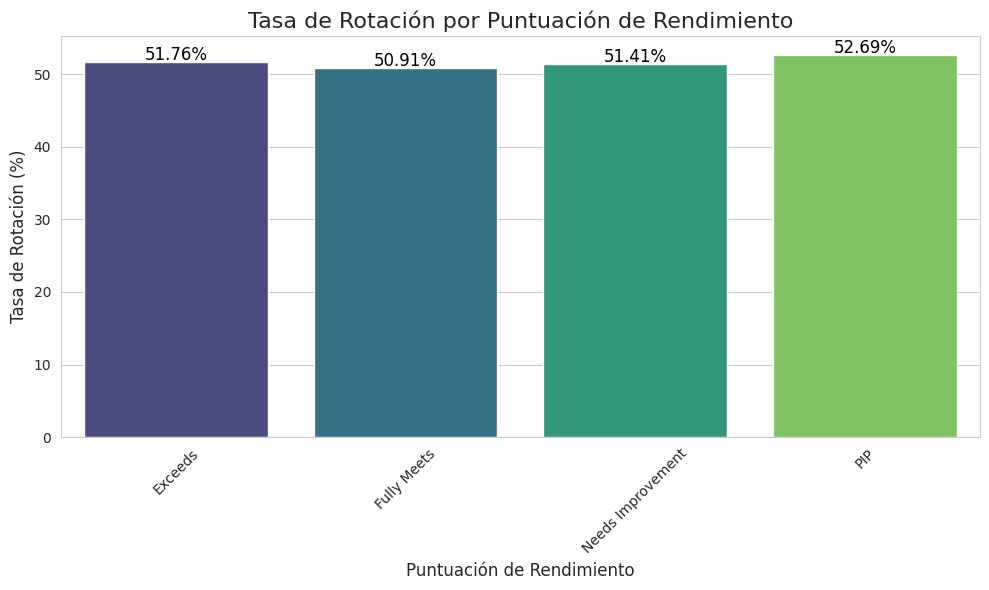

In [21]:
data = {'Performance Score': ['PIP', 'Exceeds', 'Needs Improvement', 'Fully Meets'],
        'total_employees_in_group': [93, 369, 177, 2361],
        'terminated_employees': [49, 191, 91, 1202],
        'turnover_rate': [52.688172, 51.761518, 51.412429, 50.910631]}
new_turnover_analysis = pd.DataFrame(data)

# Configurar el estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
ax = sns.barplot(
    x="Performance Score",
    y="turnover_rate",
    data=new_turnover_analysis,
    palette="viridis",
    order=["Exceeds", "Fully Meets", "Needs Improvement", "PIP"] # Ordenar de mayor a menor rendimiento
)

# Añadir etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Configurar títulos y etiquetas
plt.title("Tasa de Rotación por Puntuación de Rendimiento", fontsize=16)
plt.xlabel("Puntuación de Rendimiento", fontsize=12)
plt.ylabel("Tasa de Rotación (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
query_salary_turnover = """
SELECT
    CASE
        WHEN "MonthlyIncome" <= 3000 THEN 'Low'
        WHEN "MonthlyIncome" > 3000 AND "MonthlyIncome" <= 6000 THEN 'Medium'
        WHEN "MonthlyIncome" > 6000 AND "MonthlyIncome" <= 10000 THEN 'High'
        ELSE 'Very High'
    END AS income_group,
    AVG("MonthlyIncome") AS avg_monthly_income,
    COUNT(*) AS total_employees_in_group,
    SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS terminated_employees,
    (CAST(SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS REAL) * 100) / COUNT(*) AS turnover_rate
FROM
    employees
GROUP BY
    income_group
ORDER BY
    AVG("MonthlyIncome");
"""

salary_turnover_analysis = pd.read_sql_query(query_salary_turnover, conn)

print("Análisis de Rotación por Rango Salarial:")
print(salary_turnover_analysis)

Análisis de Rotación por Rango Salarial:
  income_group  avg_monthly_income  total_employees_in_group  \
0    Very High                 0.0                      3000   

   terminated_employees  turnover_rate  
0                  1533           51.1  


In [23]:
query_salary_turnover_revised = """
SELECT
    CASE
        WHEN "MonthlyIncome" < 3000 THEN 'Under $3,000'
        WHEN "MonthlyIncome" >= 3000 AND "MonthlyIncome" < 6000 THEN '$3,000 - $5,999'
        WHEN "MonthlyIncome" >= 6000 AND "MonthlyIncome" < 10000 THEN '$6,000 - $9,999'
        ELSE '$10,000+'
    END AS income_group,
    COUNT(*) AS total_employees,
    SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS terminated_employees,
    (CAST(SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS REAL) * 100) / COUNT(*) AS turnover_rate
FROM
    employees
WHERE
    "MonthlyIncome" IS NOT NULL AND "MonthlyIncome" > 0
GROUP BY
    income_group
ORDER BY
    MIN("MonthlyIncome");
"""

salary_turnover_analysis_revised = pd.read_sql_query(query_salary_turnover_revised, conn)

print("Análisis de Rotación por Rango Salarial (Revisado):")
print(salary_turnover_analysis_revised)

Análisis de Rotación por Rango Salarial (Revisado):
  income_group  total_employees  terminated_employees  turnover_rate
0     $10,000+             3000                  1533           51.1


/tmp/ipython-input-1744755266.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


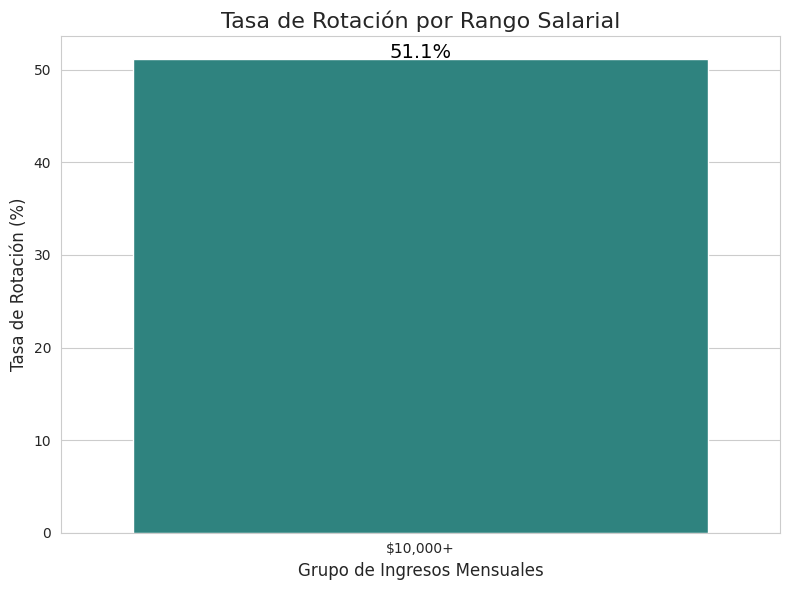

In [24]:
data = {
    'income_group': ['$10,000+'],
    'total_employees': [3000],
    'terminated_employees': [1533],
    'turnover_rate': [51.1]
}
salary_turnover_analysis_revised = pd.DataFrame(data)

# Configurar el estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
ax = sns.barplot(
    x="income_group",
    y="turnover_rate",
    data=salary_turnover_analysis_revised,
    palette="viridis"
)

# Añadir etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=14,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Configurar títulos y etiquetas
plt.title("Tasa de Rotación por Rango Salarial", fontsize=16)
plt.xlabel("Grupo de Ingresos Mensuales", fontsize=12)
plt.ylabel("Tasa de Rotación (%)", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [25]:
query_tenure_turnover = """
SELECT
    CASE
        WHEN (julianday(substr("ExitDate", 7, 4) || '-' ||
                        CASE substr("ExitDate", 4, 3)
                            WHEN 'Jan' THEN '01' WHEN 'Feb' THEN '02' WHEN 'Mar' THEN '03'
                            WHEN 'Apr' THEN '04' WHEN 'May' THEN '05' WHEN 'Jun' THEN '06'
                            WHEN 'Jul' THEN '07' WHEN 'Aug' THEN '08' WHEN 'Sep' THEN '09'
                            WHEN 'Oct' THEN '10' WHEN 'Nov' THEN '11' WHEN 'Dec' THEN '12' END || '-' ||
                        substr("ExitDate", 1, 2)) -
              julianday(substr("StartDate", 7, 4) || '-' ||
                        CASE substr("StartDate", 4, 3)
                            WHEN 'Jan' THEN '01' WHEN 'Feb' THEN '02' WHEN 'Mar' THEN '03'
                            WHEN 'Apr' THEN '04' WHEN 'May' THEN '05' WHEN 'Jun' THEN '06'
                            WHEN 'Jul' THEN '07' WHEN 'Aug' THEN '08' WHEN 'Sep' THEN '09'
                            WHEN 'Oct' THEN '10' WHEN 'Nov' THEN '11' WHEN 'Dec' THEN '12' END || '-' ||
                        substr("StartDate", 1, 2))) / 365.25 < 1 THEN 'Less than 1 Year'
        WHEN (julianday(substr("ExitDate", 7, 4) || '-' ||
                        CASE substr("ExitDate", 4, 3)
                            WHEN 'Jan' THEN '01' WHEN 'Feb' THEN '02' WHEN 'Mar' THEN '03'
                            WHEN 'Apr' THEN '04' WHEN 'May' THEN '05' WHEN 'Jun' THEN '06'
                            WHEN 'Jul' THEN '07' WHEN 'Aug' THEN '08' WHEN 'Sep' THEN '09'
                            WHEN 'Oct' THEN '10' WHEN 'Nov' THEN '11' WHEN 'Dec' THEN '12' END || '-' ||
                        substr("ExitDate", 1, 2)) -
              julianday(substr("StartDate", 7, 4) || '-' ||
                        CASE substr("StartDate", 4, 3)
                            WHEN 'Jan' THEN '01' WHEN 'Feb' THEN '02' WHEN 'Mar' THEN '03'
                            WHEN 'Apr' THEN '04' WHEN 'May' THEN '05' WHEN 'Jun' THEN '06'
                            WHEN 'Jul' THEN '07' WHEN 'Aug' THEN '08' WHEN 'Sep' THEN '09'
                            WHEN 'Oct' THEN '10' WHEN 'Nov' THEN '11' WHEN 'Dec' THEN '12' END || '-' ||
                        substr("StartDate", 1, 2))) / 365.25 BETWEEN 1 AND 3 THEN '1-3 Years'
        WHEN (julianday(substr("ExitDate", 7, 4) || '-' ||
                        CASE substr("ExitDate", 4, 3)
                            WHEN 'Jan' THEN '01' WHEN 'Feb' THEN '02' WHEN 'Mar' THEN '03'
                            WHEN 'Apr' THEN '04' WHEN 'May' THEN '05' WHEN 'Jun' THEN '06'
                            WHEN 'Jul' THEN '07' WHEN 'Aug' THEN '08' WHEN 'Sep' THEN '09'
                            WHEN 'Oct' THEN '10' WHEN 'Nov' THEN '11' WHEN 'Dec' THEN '12' END || '-' ||
                        substr("ExitDate", 1, 2)) -
              julianday(substr("StartDate", 7, 4) || '-' ||
                        CASE substr("StartDate", 4, 3)
                            WHEN 'Jan' THEN '01' WHEN 'Feb' THEN '02' WHEN 'Mar' THEN '03'
                            WHEN 'Apr' THEN '04' WHEN 'May' THEN '05' WHEN 'Jun' THEN '06'
                            WHEN 'Jul' THEN '07' WHEN 'Aug' THEN '08' WHEN 'Sep' THEN '09'
                            WHEN 'Oct' THEN '10' WHEN 'Nov' THEN '11' WHEN 'Dec' THEN '12' END || '-' ||
                        substr("StartDate", 1, 2))) / 365.25 BETWEEN 3 AND 5 THEN '3-5 Years'
        ELSE 'More than 5 Years'
    END AS tenure_group,
    COUNT(*) AS total_employees,
    SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS terminated_employees,
    (CAST(SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS REAL) * 100) / COUNT(*) AS turnover_rate
FROM
    employees
WHERE
    "ExitDate" IS NOT NULL AND "StartDate" IS NOT NULL
GROUP BY
    tenure_group
ORDER BY
    MIN(julianday("StartDate"));
"""

tenure_turnover_analysis = pd.read_sql_query(query_tenure_turnover, conn)

print("Análisis de Rotación por Antigüedad:")
print(tenure_turnover_analysis)

Análisis de Rotación por Antigüedad:
        tenure_group  total_employees  terminated_employees  turnover_rate
0  More than 5 Years             1533                  1533          100.0


In [26]:
df_tenure = df.copy()

# Convertir las columnas de fecha a formato datetime
# Se usa 'dayfirst=True' para el formato 'DD-MM-YY'
df_tenure['StartDate'] = pd.to_datetime(df_tenure['StartDate'], format='%d-%b-%y', errors='coerce')
df_tenure['ExitDate'] = pd.to_datetime(df_tenure['ExitDate'], format='%d-%b-%y', errors='coerce')

# Calcular la antigüedad en años
df_tenure['Tenure_Years'] = (df_tenure['ExitDate'] - df_tenure['StartDate']).dt.days / 365.25

# Crear los grupos de antigüedad
def get_tenure_group(years):
    if pd.isna(years):
        return None  # No aplica para empleados activos
    if years < 1:
        return 'Less than 1 Year'
    elif years >= 1 and years < 3:
        return '1-3 Years'
    elif years >= 3 and years < 5:
        return '3-5 Years'
    else:
        return 'More than 5 Years'

df_tenure['Tenure_Group'] = df_tenure['Tenure_Years'].apply(get_tenure_group)

# Ver las primeras filas del DataFrame actualizado
print("Primeras 5 filas del DataFrame con antigüedad calculada:")
print(df_tenure[['StartDate', 'ExitDate', 'Tenure_Years', 'Tenure_Group']].head())

# Volver a cargar el DataFrame actualizado en una nueva tabla SQL
df_tenure.to_sql('employees_tenure_analysis', conn, if_exists='replace', index=False)

# Ahora, realizar la consulta SQL para el análisis de rotación por antigüedad
query_tenure = """
SELECT
    "Tenure_Group",
    COUNT(*) AS total_employees,
    SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS terminated_employees,
    (CAST(SUM(CASE WHEN "ExitDate" IS NOT NULL THEN 1 ELSE 0 END) AS REAL) * 100) / COUNT(*) AS turnover_rate
FROM
    "employees_tenure_analysis"
WHERE
    "Tenure_Group" IS NOT NULL
GROUP BY
    "Tenure_Group"
ORDER BY
    MIN("Tenure_Years");
"""

tenure_analysis_corrected = pd.read_sql_query(query_tenure, conn)

print("\nAnálisis de Rotación por Antigüedad (Corregido):")
print(tenure_analysis_corrected)

Primeras 5 filas del DataFrame con antigüedad calculada:
   StartDate ExitDate  Tenure_Years Tenure_Group
0 2019-09-20      NaT           NaN         None
1 2023-02-11      NaT           NaN         None
2 2018-12-10      NaT           NaN         None
3 2021-06-21      NaT           NaN         None
4 2019-06-29      NaT           NaN         None

Análisis de Rotación por Antigüedad (Corregido):
       Tenure_Group  total_employees  terminated_employees  turnover_rate
0  Less than 1 Year              725                   725          100.0
1         1-3 Years              653                   653          100.0
2         3-5 Years              155                   155          100.0
